In [0]:
import numpy as np 
import pandas as pd

import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!ls "drive/My Drive/TubesML/"

csvfitur.csv  xlsfitur1.xlsx  xlsfitur2.xlsx  xlsfitur_cek.xlsx  xlsfitur.xlsx


In [0]:
dataset = pd.read_excel('/content/drive/My Drive/TubesML/xlsfitur.xlsx')
dataset.shape

(18278, 5)

--DATA EKSPLORASI--

In [0]:
dataset.head()


,skill_moves,skill_dribbling,skill_curve,skill_fk_accuracy,skill_ball_control
0,4,97,93,94,96
1,5,89,81,76,92
2,5,96,88,87,95
3,1,12,13,14,30
4,4,95,83,79,94


In [0]:
dataset.describe()

,skill_moves,skill_dribbling,skill_curve,skill_fk_accuracy,skill_ball_control
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,2.368038,55.596509,47.325692,42.708885,58.461976
std,0.765038,18.929118,18.422991,17.433612,16.741878
min,1.000000,4.000000,6.000000,4.000000,5.000000
25%,2.000000,50.000000,34.000000,31.000000,54.000000
50%,2.000000,61.000000,49.000000,41.000000,63.000000
75%,3.000000,68.000000,62.000000,56.000000,69.000000
max,5.000000,97.000000,94.000000,94.000000,96.000000


In [0]:
#MENCETAK JUMLAH DATA YANG NULL DI SETIAP KOLOM
dataset.isnull().sum()

skill_moves           0
skill_dribbling       0
skill_curve           0
skill_fk_accuracy     0
skill_ball_control    0
dtype: int64

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 15000x15000 with 0 Axes>

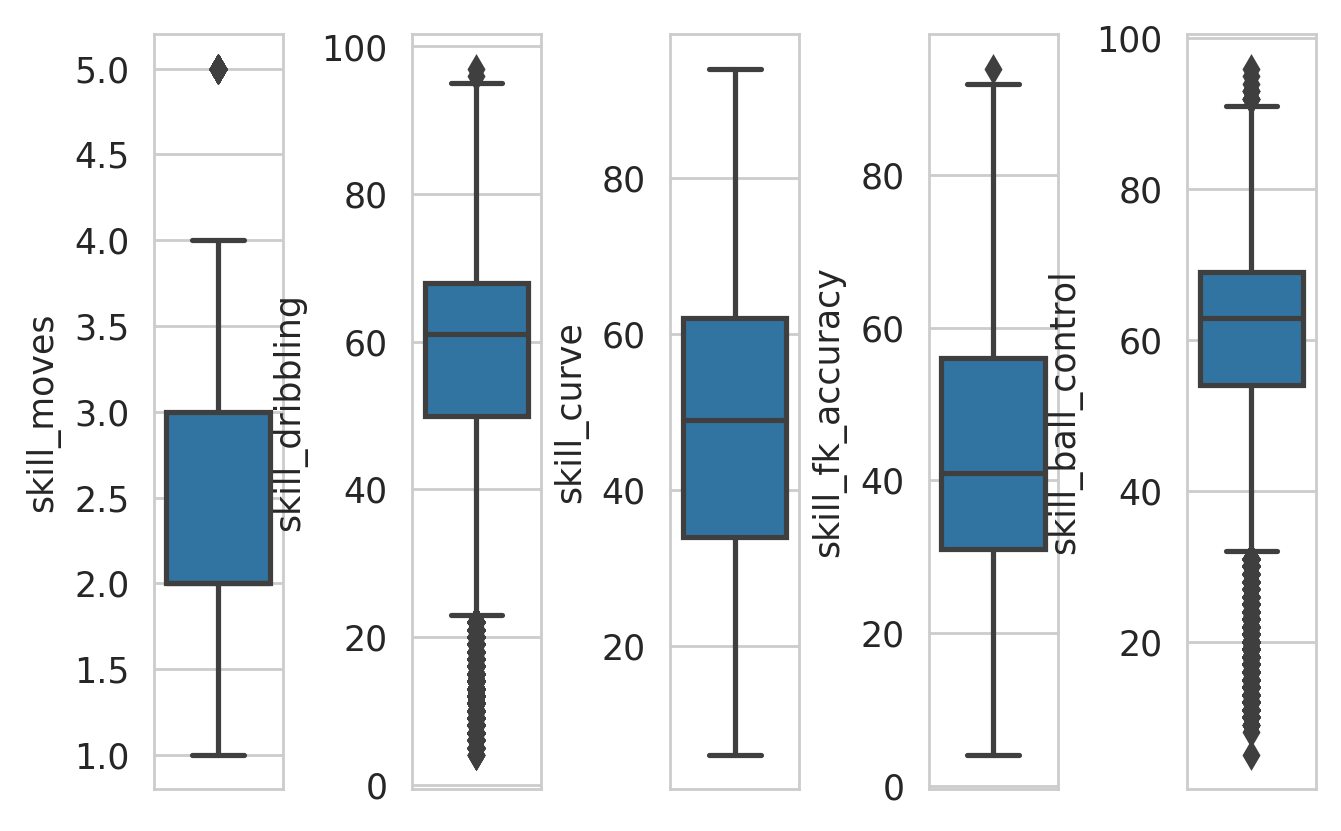

In [0]:
#MEMBUAT FIGUR UNTUK MELIHAT NILAI OUTLIER
mpl.rcParams['figure.dpi'] = 250
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 5)
sns.boxplot(y=dataset["skill_moves"], ax=axes[0])
sns.boxplot(y=dataset["skill_dribbling"], ax=axes[1])
sns.boxplot(y=dataset["skill_curve"], ax=axes[2])
sns.boxplot(y=dataset["skill_fk_accuracy"], ax=axes[3])
sns.boxplot(y=dataset["skill_ball_control"], ax=axes[4])
plt.subplots_adjust(wspace=1)

In [0]:
#MENGUBAH NILAI YANG TERMASUK KEDALAM OUTLIER DENGAN NILAI MEAN PER-KOLOM
dataset['skill_dribbling'] = dataset['skill_dribbling'].mask(dataset['skill_dribbling'] < 22, 55)
dataset['skill_ball_control'] = dataset['skill_ball_control'].mask(dataset['skill_ball_control'] < 35, 58)

In [0]:
#MEMISAHKAN KOLOM LABEL DATA
datalabel =  dataset['skill_moves'].tolist()
dataset = dataset.drop(columns=['skill_moves'])

--TRAINING DATA DENGAN NAIVE BAYES--

In [0]:
#MEMBAGI DATA MENJADI 70% DATA TRAIN DAN 30% DATA TEST
x_train, x_test, y_train, y_test = train_test_split(dataset,datalabel,test_size=0.3,random_state=0)

In [0]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predict_gnb = gnb.predict(x_test)

--EVALUASI--

---



In [0]:
#MELIHAT BANYAK DATA YANG DICLASIFIKASIKAN DENGAN BENAR DAN SALAH
y_real = pd.Series(y_test, name = 'Real')
y_predict_gnb = pd.Series(y_predict_gnb, name = 'Prediction')
table_confusion = pd.crosstab(y_real,y_predict_gnb)

table_confusion

Prediction,1,2,3,4,5
Real,,,,,
1,557,44,0,0,0
2,14,2126,487,3,0
3,0,251,1488,199,1
4,0,0,110,177,16
5,0,0,0,6,5


In [0]:
#MENAMPILKAN PERSENTASE NILAI AKURASI
classification_report(y_test,y_predict_gnb)
print('akurasi test set : {:.2f}%'.format(accuracy_score(y_test,y_predict_gnb)*100))

akurasi test set : 79.38%




---


**--------------------------BATAS MODEL (UP) DAN EKSPERIMEN (DOWN)-------------------------**


---



--EKSPERIMEN MENGGUNAKAN MODEL SVM--

In [0]:
from sklearn.svm import SVC
svm = SVC()
x_train, x_test, y_train, y_test = train_test_split(dataset,datalabel,test_size=0.3,random_state=0)
svm.fit(x_train,y_train)
y_predict_svm = svm.predict(x_test)

In [0]:
#MELIHAT BANYAK DATA YANG DICLASIFIKASIKAN DENGAN BENAR DAN SALAH
y_real = pd.Series(y_test, name = 'Real')
y_predict_svm = pd.Series(y_predict_svm, name = 'Prediction')
table_confusion = pd.crosstab(y_real,y_predict_svm)

table_confusion

Prediction,1,2,3,4
Real,,,,
1,576,25,0,0
2,9,2321,300,0
3,0,302,1594,43
4,0,0,204,99
5,0,0,2,9


In [0]:
#MENAMPILKAN PERSENTASE NILAI AKURASI
lassification_report(y_test,y_predict_svm)
print('akurasi test set : {:.2f}%'.format(accuracy_score(y_test,y_predict_svm)*100))

akurasi test set : 83.70%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
